In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/kununu_competitors.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,user_uuid,company_name,profile_uuid,profile_name,profile_city,profile_industry_name_en,company_uuid,company_city,...,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text,profile_url,company_name_short
0,20,20,7ea80496-23b9-4164-985c-7b477723589e,Robert Bosch GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,ada79380-3879-4010-aaa6-05ad898767f1,Stuttgart,...,True,NaN,True,True,True,NaN,"Faires Unternehmen, gute Konditionen, tolle Ge...",NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch
1,128,128,0cb44bd1-0104-445c-a975-b99c45001781,Dr. Ing. h.c. F. Porsche AG,dd9996e3-17dd-4a87-ae39-c71de1482922,Dr. Ing. h.c. F. Porsche AG,Stuttgart-Zuffenhausen,Automotive,ac97887a-10e4-4579-9143-74a0258b604c,Stuttgart,...,True,NaN,True,True,True,NaN,NaN,NaN,https://www.kununu.com/de/dr-ing-hc-f-porsche,Porsche
2,169,169,8684b74f-072e-4878-9ef1-a0ac9329e1f6,Bosch Gruppe,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,1473843b-47fe-43cf-96d3-b05ac8bc8f5e,Ottobrunn bei München,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch
3,326,326,640a8bfc-3789-4239-bb0f-ccb24da465fd,Bosch Solarthermie GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,8eba49ea-8dfc-4eca-b32f-836b5cb65b89,Wettringen,...,True,NaN,NaN,True,NaN,Mhh... Soll so bleiben,"Die tollen Kollegen, ein super Team",Nix,https://www.kununu.com/de/bosch-gruppe2,Bosch
4,376,376,3f69170d-2dc0-43c1-a196-7356f7ed1021,Bosch Packaging Systems GmbH,39f1ca5c-8321-4d18-85d6-3924e3a43e65,Bosch Gruppe,Stuttgart,Manufacturing,d60ff3d8-522d-43cb-ad63-74a7f804a820,Remshalden,...,NaN,NaN,NaN,True,NaN,Mehr Flexibilität und Kundenorientierung.,NaN,NaN,https://www.kununu.com/de/bosch-gruppe2,Bosch


In [4]:
# Statistic about review(amount and text length)
def review_statistics(df, review_cols):

    company_stats = {}


    grouped = df.groupby('company_name_short')[review_cols]

    for company, group in grouped:

        total_reviews = 0
        word_lengths = []


        for col in review_cols:
            non_null_reviews = group[col].dropna()  
            total_reviews += len(non_null_reviews)  


            word_lengths += non_null_reviews.apply(lambda x: len(str(x).split())).tolist()


        if word_lengths:
            max_length = max(word_lengths)
            min_length = min(word_lengths)
            mean_length = sum(word_lengths) / len(word_lengths)
        else:
            max_length = min_length = mean_length = 0


        company_stats[company] = {
            'total_reviews': total_reviews,
            'max_length': max_length,
            'min_length': min_length,
            'mean_length': mean_length
        }


    stats_df = pd.DataFrame(company_stats).T
    return stats_df


review_cols = [
    "employer_atmosphere_score_text", "employer_communication_score_text", "employer_teamwork_score_text",
    "employer_work_life_score_text", "employer_leadership_score_text", "employer_tasks_score_text",
    "employer_equality_score_text", "employer_old_colleagues_score_text", "employer_work_conditions_score_text",
    "employer_environment_score_text", "employer_salary_score_text", "employer_image_score_text",
    "employer_career_score_text", "feedback_suggestion_text", "feedback_positive_text", "feedback_negative_text"
]
df_review_stats = review_statistics(df, review_cols)
print(df_review_stats)

                total_reviews  max_length  min_length  mean_length
Adidas                 1967.0       145.0         1.0    12.418404
Bosch                 14406.0       194.0         1.0    13.444468
Burberry                 46.0       171.0         1.0    21.586957
Giorgio Armani           28.0        23.0         1.0     7.357143
Hugo Boss              1492.0       366.0         1.0    18.025469
LVMH                    400.0       165.0         1.0    19.777500
Marc O'Polo             584.0       176.0         1.0    17.551370
Mercedes-Benz          4660.0       192.0         1.0    14.742918
PVH                     649.0       185.0         1.0    15.548536
Porsche               10949.0       193.0         1.0    17.138460
Ralph Lauren            122.0        60.0         1.0    11.836066


In [5]:

reviews_list = []


for col in review_cols:

    temp_df = df[['company_name_short', col]].dropna()


    temp_df = temp_df.rename(columns={col: 'review'})


    reviews_list.append(temp_df)


df_reviews = pd.concat(reviews_list, ignore_index=True)


print(df_reviews.head(10))


  company_name_short                                             review
0            Porsche         Gutes Team, Flexibel auch wegen HomeOffice
1          Hugo Boss  Eine entspannte Arbeitsatmosphäre, nette Kolle...
2              Bosch  Tolle Kollegen, freundliche art der Zusammenar...
3                PVH  Absolut abhängig vom Store Team selbst, in den...
4              Bosch  Nichts zu beanstanden, hilfsbereite Teamleiter...
5          Hugo Boss  HB ist ein toller Arbeitgeber mit einer offene...
6            Porsche  Ich möchte besonders das super Betriebsklima h...
7             Adidas  People who can not lead were promoted in posit...
8              Bosch  manchmal sehr angespannt und stressig. Alle Ko...
9              Bosch  Angenehm. Kein starres Führen, kein Micromanag...


In [6]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [7]:
# Train topic modelling to find topic among all the reviews
from bertopic import BERTopic


def bert_topic_modeling(df):

    all_reviews = df['review'].dropna().tolist()  


    topic_model = BERTopic(language="german")


    topics, probs = topic_model.fit_transform(all_reviews)

    return topic_model, topics, probs


topic_model, topics, probs = bert_topic_modeling(df_reviews)


print(topic_model.get_topic_info())


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

     Topic  Count                                               Name  \
0       -1  13454                         -1_man_und_mitarbeiter_die   
1        0    921          0_arbeitszeiten_überstunden_stunden_woche   
2        1    891               1_team_teams_zusammenhalt_teamspirit   
3        2    856                    2_ältere_älteren_kollegen_junge   
4        3    719                          3_bosch_robert_gmbh_werte   
..     ...    ...                                                ...   
375    374     10  374_ausstattung_entschaedigung_ausgerüstet_äuß...   
376    375     10   375_retten_badminton_weihnachtsmärkte_tatkräftig   
377    376     10  376_glückspilze_mitarbeiterbewertungsprogramm_...   
378    377     10        377_zahlen_zählen_stimmen_auslastungszahlen   
379    378     10         378_respekt_respektvoll_anerkennend_tugend   

                                        Representation  \
0    [man, und, mitarbeiter, die, nicht, der, es, s...   
1    [arbeitszeiten

In [49]:

print(topic_model.get_topic_info()[:11])


    Topic  Count                                                Name  \
0      -1  13454                          -1_man_und_mitarbeiter_die   
1       0    921           0_arbeitszeiten_überstunden_stunden_woche   
2       1    891                1_team_teams_zusammenhalt_teamspirit   
3       2    856                     2_ältere_älteren_kollegen_junge   
4       3    719                           3_bosch_robert_gmbh_werte   
5       4    612                    4_homeoffice_home_office_möglich   
6       5    593      5_praktikanten_praktikant_praktikum_praktikums   
7       6    588             6_frauen_männer_frau_führungspositionen   
8       7    527              7_büros_großraumbüros_büro_ausstattung   
9       8    446                          8_porsche_ag_leipzig_marke   
10      9    431  9_führungskräfte_führung_vorgesetzte_führungskraft   

                                                                                                                   Representation  \
0 

For the employees from all the compeditor companies, there are the most important topics they concern about:

    0: "arbeitszeiten_überstunden",
    1: "teams_zusammenhalt",
    2: "älteren_kollegen_junge",   
    4: "homeoffice_möglich",    
    6: "frauen_männer_führungspositionen",
    7: "büros_ausstattung",    
    9: "führungskräfte_führungskompetenz"

The next step we can do is sentimental analysis. In this part, i think we can focus on, the Hugo Boss's and its compeditors' employees review(positive/negative) of the topics cared about(caculate the persentage of positive review out of all the reviews to see the satisfied level). And then we can find out, in which aspect, Hugo Boss need to improve.

In [12]:
df_reviews['topic'] = topics
df_reviews['prob'] = probs

In [13]:
df_reviews

,company_name_short,review,topic,prob
0,Porsche,"Gutes Team, Flexibel auch wegen HomeOffice",1,0.898074
1,Hugo Boss,"Eine entspannte Arbeitsatmosphäre, nette Kolle...",-1,0.000000
2,Bosch,"Tolle Kollegen, freundliche art der Zusammenar...",11,1.000000
3,PVH,"Absolut abhängig vom Store Team selbst, in den...",1,1.000000
4,Bosch,"Nichts zu beanstanden, hilfsbereite Teamleiter...",371,1.000000
...,...,...,...,...
35298,Porsche,alte Männer in Führungspositionen die tw. noch...,2,1.000000
35299,Bosch,keine Kantine,115,0.183750
35300,Bosch,alles geheim!,-1,0.000000
35301,Porsche,"Mitunter sehr abhängig vom Team, wie Kultur, Z...",1,1.000000


In [36]:
topics_of_interest = [0, 1, 2, 4, 6, 7, 8, 9]
filtered_reviews = df_reviews[df_reviews['topic'].isin(topics_of_interest)]


print(filtered_reviews)

      company_name_short  \
0                Porsche   
3                    PVH   
7                 Adidas   
11                 Bosch   
13               Porsche   
...                  ...   
35288              Bosch   
35291            Porsche   
35293              Bosch   
35298            Porsche   
35301            Porsche   

                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0                                                                                                                                                                                                                                                      

In [37]:
# Translate into English to get better result for Sentimental Analysis
import torch
from transformers import MarianMTModel, MarianTokenizer


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


translation_model = MarianMTModel.from_pretrained('Helsinki-NLP/opus-mt-de-en').to(device)
translation_tokenizer = MarianTokenizer.from_pretrained('Helsinki-NLP/opus-mt-de-en')



def translate_to_english(text):

    inputs = translation_tokenizer(text, return_tensors="pt", padding=True).to(device)


    translated = translation_model.generate(**inputs)


    return translation_tokenizer.decode(translated[0], skip_special_tokens=True)




filtered_reviews['review_en'] = filtered_reviews['review'].apply(translate_to_english)



In [38]:
# Sentimental Analysis
from transformers import pipeline
import torch


device = 0 if torch.cuda.is_available() else -1


sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", device=device)


def analyze_sentiment(review_en):

    result = sentiment_analyzer(review_en)[0]


    if result['label'] == 'POSITIVE':
        return 1  # Positive
    else:
        return 0  # Negative or neutral (treat neutral as negative in this case)


filtered_reviews['sentiment'] = filtered_reviews['review_en'].apply(analyze_sentiment)


print(filtered_reviews.head())


   company_name_short  \
0             Porsche   
3                 PVH   
7              Adidas   
11              Bosch   
13            Porsche   

                                                                                                                                                                                                                                                                                                                                                                                                                   review  \
0                                                                                                                                                                                                                                                                                                                                                                              Gutes Team, Flexibel auch wegen HomeOffice   
3                      

In [51]:

topic_mapping = {
    0: "arbeitszeiten_überstunden",
    1: "teams_zusammenhalt",
    2: "älteren_kollegen_junge",

    4: "homeoffice_möglich",

    6: "frauen_männer_führungspositionen",
    7: "büros_ausstattung",

    9: "führungskräfte_führungskompetenz"
}


filtered_reviews['topic_name'] = filtered_reviews['topic'].map(topic_mapping)
filtered_reviews = filtered_reviews.dropna(subset=['topic_name'])

print(filtered_reviews.head())


   company_name_short  \
0             Porsche   
3                 PVH   
7              Adidas   
11              Bosch   
13            Porsche   

                                                                                                                                                                                                                                                                                                                                                                                                                   review  \
0                                                                                                                                                                                                                                                                                                                                                                              Gutes Team, Flexibel auch wegen HomeOffice   
3                      

In [53]:
import pandas as pd
from google.colab import files



file_path = 'filtered_reviews.csv'
filtered_reviews.to_csv(file_path, index=False, encoding='utf-8')


files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filtered_reviews = pd.read_csv('data/filtered_reviews.csv', sep=',')  

In [63]:
topic_counts = filtered_reviews.groupby(['company_name_short', 'topic']).size().reset_index(name='review_count')
pd.set_option('display.max_rows', None)

print(topic_counts)

   company_name_short  topic  review_count
0              Adidas      0            43
1              Adidas      1            54
2              Adidas      2            63
3              Adidas      4            25
4              Adidas      6            23
5              Adidas      7            17
6              Adidas      9            35
7               Bosch      0           381
8               Bosch      1           294
9               Bosch      2           342
10              Bosch      4           291
11              Bosch      6           232
12              Bosch      7           216
13              Bosch      9           138
14           Burberry      0             1
15           Burberry      1             5
16           Burberry      2             1
17           Burberry      9             1
18     Giorgio Armani      1             1
19     Giorgio Armani      2             1
20     Giorgio Armani      7             2
21     Giorgio Armani      9             1
22         

Due to the amount of reviews, we only include  Adidas, Bosch, Hugo Boss, Benz, Porsche.

In [57]:
import pandas as pd


results = []


for company in filtered_reviews['company_name_short'].unique():

    company_reviews = filtered_reviews[filtered_reviews['company_name_short'] == company]


    for topic in company_reviews['topic_name'].unique():

        topic_reviews = company_reviews[company_reviews['topic_name'] == topic]


        positive_rate = topic_reviews['sentiment'].mean()  

        results.append({
            'company_name_short': company,
            'topic_name': topic,
            'positive_rate': positive_rate
        })


positive_rate_df = pd.DataFrame(results)


print(positive_rate_df)


   company_name_short                        topic_name  positive_rate
0             Porsche                teams_zusammenhalt       0.860465
1             Porsche  führungskräfte_führungskompetenz       0.123967
2             Porsche                homeoffice_möglich       0.666667
3             Porsche         arbeitszeiten_überstunden       0.503311
4             Porsche            älteren_kollegen_junge       0.574627
..                ...                               ...            ...
65       Ralph Lauren         arbeitszeiten_überstunden       0.166667
66       Ralph Lauren  führungskräfte_führungskompetenz       0.500000
67       Ralph Lauren                 büros_ausstattung       1.000000
68       Ralph Lauren                teams_zusammenhalt       1.000000
69       Ralph Lauren  frauen_männer_führungspositionen       1.000000

[70 rows x 3 columns]


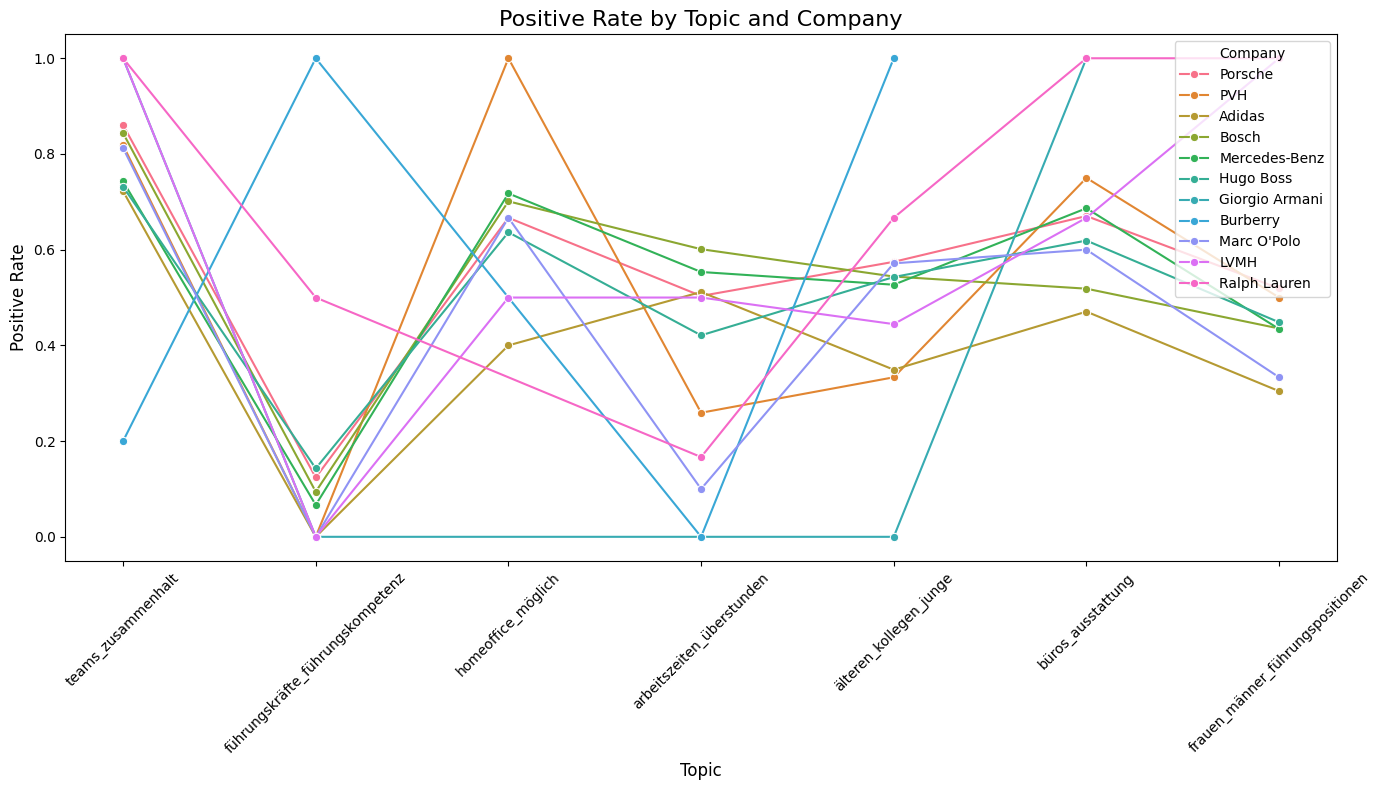

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 8))


sns.lineplot(data=positive_rate_df, x='topic_name', y='positive_rate', hue='company_name_short', marker='o')


plt.title('Positive Rate by Topic and Company', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Positive Rate', fontsize=12)


plt.xticks(rotation=45)


plt.legend(title='Company')


plt.tight_layout()
plt.show()


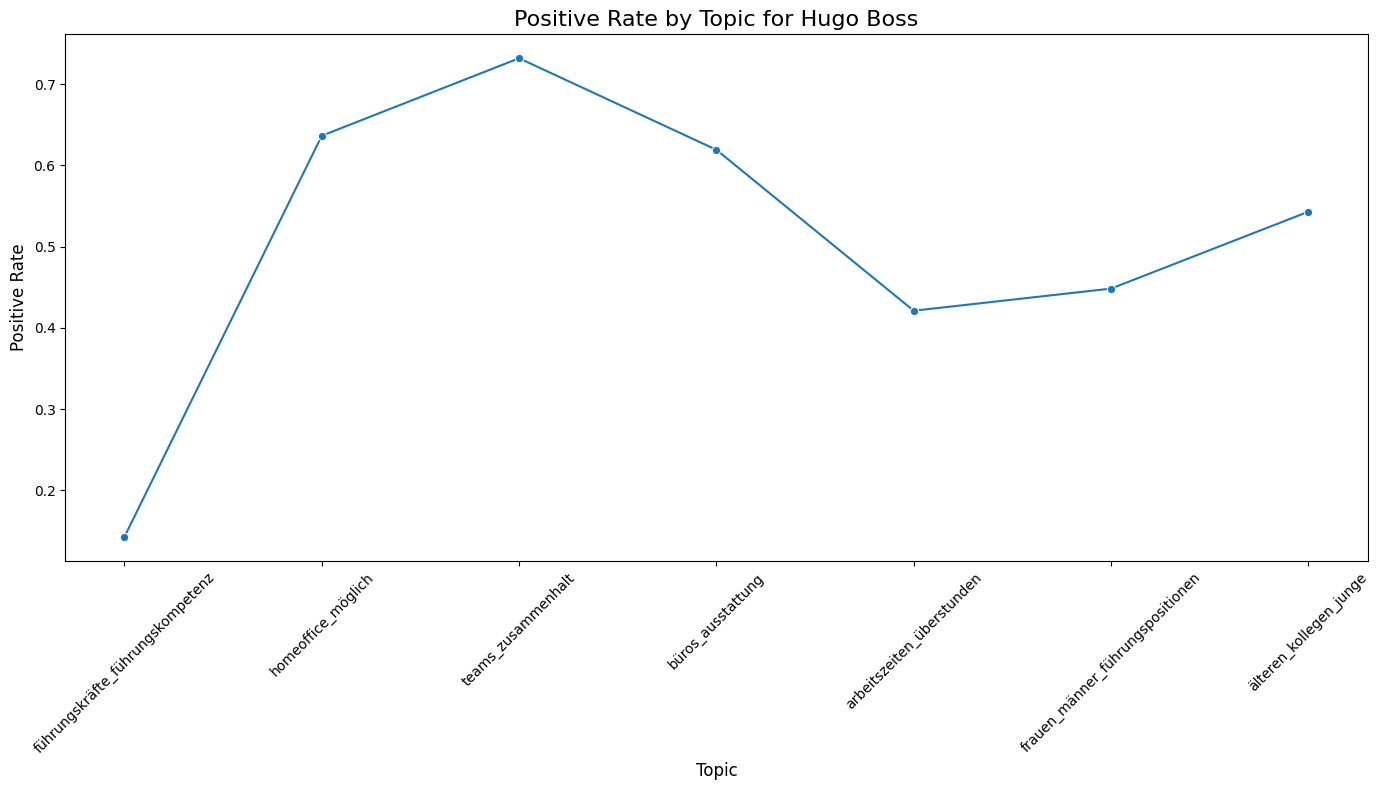

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt


hugo_boss_data = positive_rate_df[positive_rate_df['company_name_short'] == 'Hugo Boss']


plt.figure(figsize=(14, 8))


sns.lineplot(data=hugo_boss_data, x='topic_name', y='positive_rate', marker='o')


plt.title('Positive Rate by Topic for Hugo Boss', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Positive Rate', fontsize=12)


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()
